### 1.

A partir del dataset mnist (tf.keras.datasets.cifar10.load_data()), realiza una clasificación usando:

** Las imágenes son a color, es decir, tienen 3 dimensiones (rgb). Para este problema, antes de empezar, transforma las imágenes a blanco y negro para que tengan 1 sola dimensión de profundidad **. 

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

¿ Cuál ha dado mejor resultado?

Para compilar el modelo, usa:

In [16]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

import cv2
print(tf.__version__)

2.3.1


In [17]:
tf.keras.datasets.cifar10.load_data()
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

In [ ]:
############

In [3]:
# OTRA FORMA SERÍA:
# aplico la funcion cv2.cvtColor a cada elemento de X_train y luego lo paso a array
new_array = [cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY) for pic in X_train]
X_train = np.array(new_array)

In [ ]:
new_array_t = [cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY) for pic in X_test]
X_test = np.array(new_array_t)

In [ ]:
##############

In [18]:
def grayscale(data, dtype='float32'):
    # luma coding weighted average in video systems
    r, g, b = np.asarray(.3, dtype=dtype), np.asarray(.59, dtype=dtype), np.asarray(.11, dtype=dtype)
    rst = r * data[:, :, :, 0] + g * data[:, :, :, 1] + b * data[:, :, :, 2]
    # add channel dimension
    rst = np.expand_dims(rst, axis=3)
    return rst

In [19]:
train_images = grayscale(train_images)
test_images = grayscale(test_images)

In [20]:
print(train_images.shape)
print(train_labels.shape)
print(len(train_labels))
print(len(test_labels))

(50000, 32, 32, 1)
(50000, 1)
50000
10000


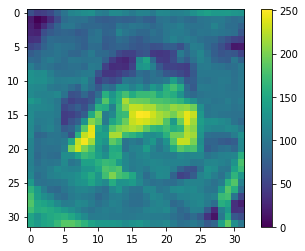

In [7]:
# Pre-procese el set de datos
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [21]:
TRAINING_SIZE = len(train_images)
TEST_SIZE = len(test_images)


# Convert the pixel values from integers between 0 and 255 to floats between 0 and 1
train_images /= 255
test_images /=  255

In [22]:
train_images.shape

(50000, 32, 32, 1)

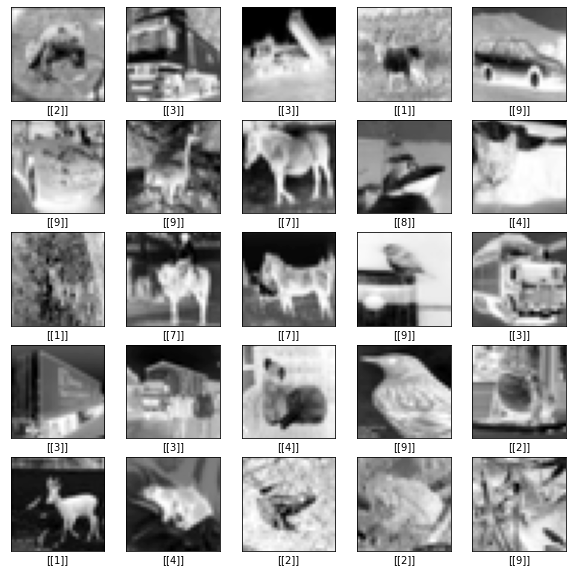

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[train_labels[i]])
plt.show()

In [23]:
train_images.shape

(50000, 32, 32, 1)

In [24]:
train_images_gr = train_images.reshape(train_images.shape[0], 32, 32, 1)
test_images_gr = test_images.reshape(test_images.shape[0], 32, 32, 1)

print("train_images_gr shape:", train_images_gr.shape)
print("test_images_gr shape:", test_images_gr.shape)

train_images_gr shape: (50000, 32, 32, 1)
test_images_gr shape: (10000, 32, 32, 1)


In [ ]:
1. Una CNN con:

    1 capa convolutiva con 8 neuronas
    1 MaxPool quedando las dimensiones de la imagen a la mitad
    1 dropout 0.25
    1 Flatten
    1 dense con 32 neuronas
    1 dense con 10 (salida)

In [ ]:
# Configurar capas
"""
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
"""
tf.config.run_functions_eagerly(True)


INPUT_SHAPE = (32,32,1)

model = keras.models.Sequential()
# filte= numero neuronas
# First conv-pool layers - set 1
model.add(keras.layers.Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="valid", input_shape=INPUT_SHAPE))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))


# Flatten layer
model.add(keras.layers.Flatten())

# Dense layer with dropout
model.add(keras.layers.Dense(units=32, activation="relu"))
model.add(keras.layers.Dropout(rate=0.25))
# Output layer
model.add(keras.layers.Dense(units=10, activation="softmax"))
model.summary()

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 32s 21ms/step - loss: 2.1083 - accuracy: 0.1985
Epoch 2/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.8439 - accuracy: 0.3146
Epoch 3/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.7103 - accuracy: 0.3704
Epoch 4/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.6360 - accuracy: 0.4037
Epoch 5/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.5830 - accuracy: 0.4242
Epoch 6/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.5605 - accuracy: 0.4332
Epoch 7/10
1563/1563 [==============================] - 32s 21ms/step - loss: 1.5271 - accuracy: 0.4436
Epoch 8/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.5044 - accuracy: 0.4504
Epoch 9/10
1563/1563 [==============================] - 143s 91ms/step - loss: 1.4877 - accuracy: 0.4622
Epoch 10/10
1563/1563 [==============================] - 36s 23

In [14]:
# Evaluar Exactitud
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 3s - loss: 1.3834 - accuracy: 0.5192

Test accuracy: 0.5192000269889832


In [16]:
# Hacer predicciones
predictions = model.predict(test_images)
predictions[0]

array([0.01638325, 0.00797631, 0.10258195, 0.2282455 , 0.16306938,
       0.196463  , 0.09464522, 0.15854464, 0.01846694, 0.01362381],
      dtype=float32)

In [17]:
np.argmax(predictions[0])

3

In [18]:
test_labels[0]

array([3], dtype=uint8)

In [ ]:
2. Una CNN con:

    1 capa convolutiva con 8 neuronas
    1 MaxPool quedando las dimensiones de la imagen a la mitad
    1 dropout 0.25
    1 Flatten
    1 dense con 16 neuronas
    1 dense con 32 neuronas
    1 dense con 10 (salida)

In [28]:
# Configurar capas
"""
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
"""
tf.config.run_functions_eagerly(True)


INPUT_SHAPE = (32,32,1)

model = keras.models.Sequential()
# filte= numero neuronas
# First conv-pool layers - set 1
model.add(keras.layers.Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="valid", input_shape=INPUT_SHAPE))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))


# Flatten layer
model.add(keras.layers.Flatten())

# Dense layer with dropout
model.add(keras.layers.Dense(units=16, activation="relu"))
model.add(keras.layers.Dense(units=32, activation="relu"))
model.add(keras.layers.Dropout(rate=0.25))
# Output layer
model.add(keras.layers.Dense(units=10, activation="softmax"))
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 8)         80        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 8)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1800)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)                28816     
_________________________________________________________________
dense_10 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

In [29]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 35s 23ms/step - loss: 1.9952 - accuracy: 0.2289
Epoch 2/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.7960 - accuracy: 0.3049
Epoch 3/10
1563/1563 [==============================] - 35s 23ms/step - loss: 1.7406 - accuracy: 0.3344
Epoch 4/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.6971 - accuracy: 0.3558
Epoch 5/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.6543 - accuracy: 0.3753
Epoch 6/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.6003 - accuracy: 0.4042
Epoch 7/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.5518 - accuracy: 0.4381
Epoch 8/10
1563/1563 [==============================] - 43s 27ms/step - loss: 1.5226 - accuracy: 0.4485
Epoch 9/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.5023 - accuracy: 0.4595
Epoch 10/10
1563/1563 [==============================] - 37s 24m

In [31]:
# Evaluar Exactitud
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 1.5158 - accuracy: 0.4471

Test accuracy: 0.4471000134944916


### 2.

**BONUS: Entrena la red neuronal 1 pero esta vez con las imágenes a color.**

In [40]:
tf.keras.datasets.cifar10.load_data()
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

In [41]:
print(train_images.shape)
print(train_labels.shape)
print(len(train_labels))
print(len(test_labels))


(50000, 32, 32, 3)
(50000, 1)
50000
10000


In [46]:
TRAINING_SIZE = len(train_images)
TEST_SIZE = len(test_images)

train_images = train_images/255
test_images = test_images/255


In [47]:
train_images.shape

(50000, 32, 32, 3)

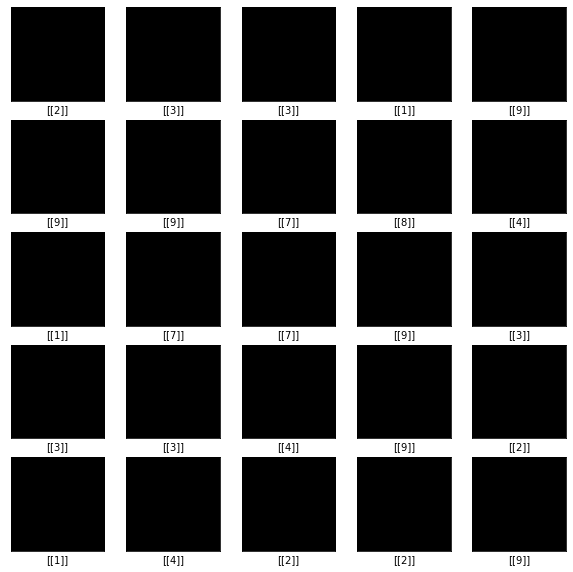

In [48]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[train_labels[i]])
plt.show()

In [49]:
train_images_gr = train_images.reshape(train_images.shape[0], 32, 32, 3)
test_images_gr = test_images.reshape(test_images.shape[0], 32, 32, 3)

print("train_images_gr shape:", train_images_gr.shape)
print("test_images_gr shape:", test_images_gr.shape)

train_images_gr shape: (50000, 32, 32, 3)
test_images_gr shape: (10000, 32, 32, 3)


In [50]:
# Configurar capas
"""
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
"""
tf.config.run_functions_eagerly(True)


INPUT_SHAPE = (32,32,3)

model = keras.models.Sequential()
# filte= numero neuronas
# First conv-pool layers - set 1
model.add(keras.layers.Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="valid", input_shape=INPUT_SHAPE))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))


# Flatten layer
model.add(keras.layers.Flatten())

# Dense layer with dropout
model.add(keras.layers.Dense(units=32, activation="relu"))
model.add(keras.layers.Dropout(rate=0.25))
# Output layer
model.add(keras.layers.Dense(units=10, activation="softmax"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 8)         224       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 8)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1800)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                57632     
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                330       
Total params: 58,186
Trainable params: 58,186
Non-trainable params: 0
__________________________________________________

In [51]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 42s 27ms/step - loss: 2.3028 - accuracy: 0.1001
Epoch 2/10
1563/1563 [==============================] - 42s 27ms/step - loss: 2.3028 - accuracy: 0.0993
Epoch 3/10
1563/1563 [==============================] - 43s 27ms/step - loss: 2.3028 - accuracy: 0.0966
Epoch 4/10
1563/1563 [==============================] - 43s 28ms/step - loss: 2.3028 - accuracy: 0.0980
Epoch 5/10
1563/1563 [==============================] - 43s 28ms/step - loss: 2.3028 - accuracy: 0.0984
Epoch 6/10
1563/1563 [==============================] - 43s 27ms/step - loss: 2.3027 - accuracy: 0.1001
Epoch 7/10
1563/1563 [==============================] - 44s 28ms/step - loss: 2.3028 - accuracy: 0.0989
Epoch 8/10
1563/1563 [==============================] - 45s 29ms/step - loss: 2.3028 - accuracy: 0.0988
Epoch 9/10
1563/1563 [==============================] - 44s 28ms/step - loss: 2.3028 - accuracy: 0.0994
Epoch 10/10
1563/1563 [==============================] - 43s 28m

In [53]:
# Evaluar Exactitud
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 3s - loss: 2.4080 - accuracy: 0.1000

Test accuracy: 0.10000000149011612
